# Task :Prediction using Supervised ML
## Submitted by : Subhadip Dutta

## Problem Statement:<br>
-Predict the percentage of an student based on the no. of study hours.

### Step 1:Importing libraries and data

In [612]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [613]:
# Importing Student data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [614]:
#Check Sample data
df.head()

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30


### Step 2:Inspecting data

In [615]:
#Check info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [616]:
#Check dtype
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [617]:
#Change column dtype of Score to float64
df['Scores']=pd. to_numeric(df['Scores'], downcast="float")

In [618]:
#Check dtype after conversion
df.dtypes

Hours     float64
Scores    float32
dtype: object

In [619]:
#Checking null % in columns
df.isnull().sum()*100/len(df)

Hours    0.000000
Scores   0.000000
dtype: float64

There are no null values in data

In [620]:
#Check data distribution
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286888
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We can see from above that there are 25 student records and avg hours spent is 5hrs and avg marks is 51.There are no outliers that is hours lie with 1-9 and marks lie within 17-95.

### Step 3: EDA

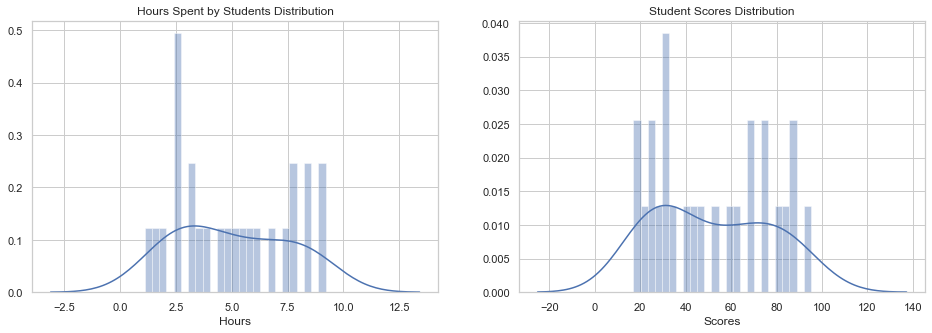

In [621]:
#We can check the univariate distribution through a histogram
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.set(style="whitegrid")
plt.title('Hours Spent by Students Distribution')
sns.distplot(df['Hours'], bins = 25)
plt.subplot(1,2,2)
plt.title('Student Scores Distribution')
sns.distplot(df['Scores'], bins = 25)
plt.show()

In [622]:
#Normalize the target feature using Log transformation
df['Scores'] = np.log1p(df['Scores'])

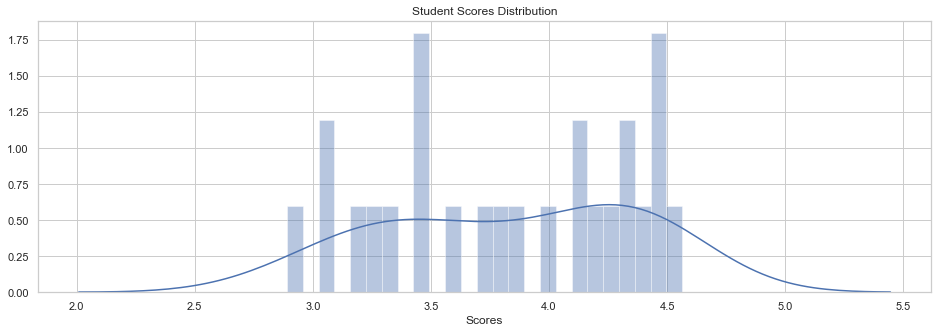

In [623]:
#We can check the univariate distribution through a histogram
plt.figure(figsize=(16,5))

plt.title('Student Scores Distribution')
sns.distplot(df['Scores'], bins = 25)
plt.show()

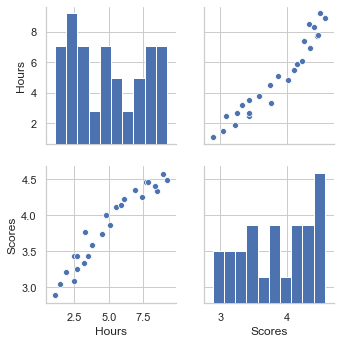

In [624]:
#We can check the pairplot of both features
sns.pairplot(df, vars=["Hours", "Scores"])
plt.show()

#### Check Correlation

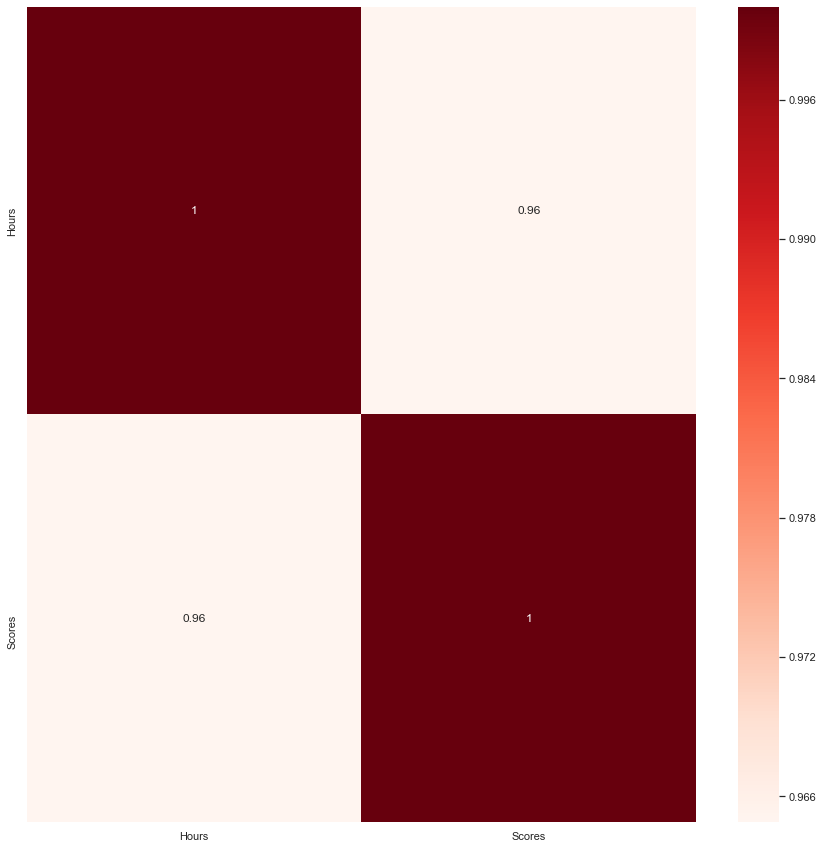

In [625]:
#Visualize using heatmap
plt.figure(figsize=[15,15])
ax=sns.heatmap(df.corr(), annot = True, cmap = "Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

As we can see there is high correlation between hour and score so we can use Linear regression model

## Step 4: Splitting data into Train and Test sets

In [626]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 101)

In [627]:
df_test_backup = df_test.copy()

In [628]:
#Check Train data
df_train

,Hours,Scores
21,4.800000,4.007333
2,3.200000,3.332205
3,8.500000,4.330733
1,5.100000,3.871201
14,1.100000,2.890372
18,6.100000,4.219508
0,2.500000,3.091043
12,4.500000,3.737670
5,1.500000,3.044523
23,6.900000,4.343805


In [629]:
#Check test data
df_test

,Hours,Scores
16,2.500000,3.433987
10,7.700000,4.454347
22,3.800000,3.583519
19,7.400000,4.248495
7,5.500000,4.110874


### Rescaling features

In [630]:
#Use Standard Scaler
scaler = MinMaxScaler()

In [631]:
# Apply scaler() to the dependent feature variables
num_vars = ['Hours']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Hours,Scores
21,0.456790,4.007333
2,0.259259,3.332205
3,0.913580,4.330733
1,0.493827,3.871201
14,0.000000,2.890372


### Diving the data into dependent(X) and independent variables(y)

In [632]:
y_train = df_train.pop('Scores')
X_train = df_train

## Step 5: Building Model

In [633]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [634]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     240.9
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.27e-12
Time:                        11:27:27   Log-Likelihood:                 10.637
No. Observations:                  20   AIC:                            -17.27
Df Residuals:                      18   BIC:                            -15.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0286      0.060     50.429      0.0

In [635]:
#Find the regression line parameters
slope = lm.params[1]
coeff = lm.params[0]

print("The regression line equation is Y= %f x + %f" %(slope, coeff))

The regression line equation is Y= 1.640246 x + 3.028616


We can see that the R2 score is pretty high for the train set i.e 93% and the coeffecient value is high for Hours feature as well as std error is pretty low.So we can say that we have built our model pretty well.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [636]:
y_train_score = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

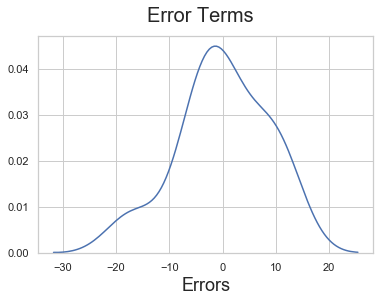

In [637]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((np.exp(y_train) - np.exp(y_train_score)), bins = 25,hist=False)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

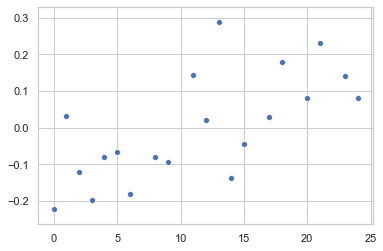

In [638]:
sns.scatterplot(data=y_train - y_train_score)

As we can see the errors dont have a pattern so we have predicted correctly.

## Making Predictions

#### Applying the scaling on the test sets

In [639]:
num_vars = ['Hours']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [640]:
y_test = df_test.pop('Scores')
X_test = df_test

In [641]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [642]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

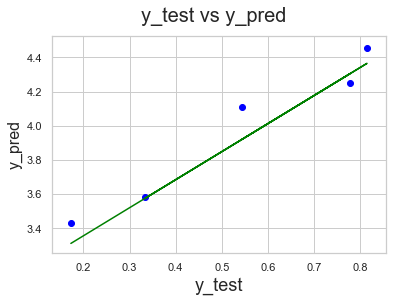

In [643]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='green')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [644]:
#R2_score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9185751344838201

## Conclusion

The train set had an `R2_score` of `93%` and test set had an `R2_score` of `92%`.

In [645]:
#Check DataFrame to see the Actual and Predicted Scores
df_test_backup['y_pred']=round(np.expm1(y_pred),0)
df_test_backup['Scores']=round(np.expm1(df_test_backup['Scores']),0)
df_test_backup.columns = ['Hours', 'Actual Scores', 'Predicted Scores']

df_test_backup.head()

,Hours,Actual Scores,Predicted Scores
16,2.500000,30.000000,26.000000
10,7.700000,85.000000,78.000000
22,3.800000,35.000000,35.000000
19,7.400000,69.000000,73.000000
7,5.500000,60.000000,49.000000
